# Movie Recommendation System

<img src="movie.jpeg" width="800" height="400">

### Data Source: https://grouplens.org/datasets/movielens/100k/

### How the Recommendation system works ?

<img src="item.png" width="400" height="200">

As in given eg:  Here User 1 & User 2 purchase apples and Oranges so it his higher chance that we can also recommend our next user (User 3) to buy apple/orange 

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [10]:
col_names = ["user_id","item_id","rating","timestamp"]

df = pd.read_csv("ml-100k/u.data",sep = "\t",names = col_names)

In [11]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
df.shape

(100000, 4)

In [13]:
df.item_id.nunique()   #Total 1682 unique item_id means 1682 total movies id we have

1682

In [14]:
df.user_id.nunique()   #Total 943 unique user_id 

943

In [16]:
df.rating.unique()    # rating from 1 to 5 

array([3, 1, 2, 4, 5], dtype=int64)

### Here in these dataset we have id of movies but not title names of movies so for that we have to load another dataset 

In [23]:
df1 = pd.read_csv("ml-100k/u.item",sep = "\|",header = None)

In [24]:
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### There are many features but as of now we can take 2 features item_id and title name 

In [25]:
df1 = df1[[0,1]]

In [27]:
df1.columns = ['item_id',"title"]

In [29]:
df1.head(2)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [30]:
df = pd.merge(df,df1, on = "item_id")

In [32]:
df.sample(5)

,user_id,item_id,rating,timestamp,title
3400,280,1,4,891700426,Toy Story (1995)
72360,864,747,3,888890380,Benny & Joon (1993)
89344,687,988,3,884652429,"Beautician and the Beast, The (1997)"
36963,919,508,5,875288570,"People vs. Larry Flynt, The (1996)"
72786,748,847,4,879454546,Looking for Richard (1996)


In [33]:
df.shape

(100000, 5)

# Exploratory Data Analysis

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [39]:
df.shape

(100000, 5)

In [40]:
df.title.nunique()

1664

#### So,here we have total 100k datapoints and total 1664 Movies so that means there might me many ratings associated to movies so we can classify that and conclude some results out of that

In [41]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)


### Q1: Observe Movies with highest Average rating as well as with less Average rating

In [51]:
mean_ratings = df.groupby("title")["rating"].mean().sort_values(ascending = False)

In [52]:
mean_ratings.head(5)   # Movies highly rated average 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [53]:
mean_ratings.tail(5)   #Movies with lower average rating

title
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, dtype: float64

### Q2: How many times a movie have been watched by the critics ?

In [57]:
df.groupby("title")['rating'].count().sort_values(ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

### Conclusion:
#### Star wars which was released in 1977 was one the highest grossing movies of all time with box-office of 777 Milion  $, So it is highly watched by critics and similar to that we can observe some movies like Return of Jedi , Liar Liar ,     Fargo ... These all are Popular highest grossing films

### Q3: Now There might be Some movies that have 5 Average rating but watched by very few and some movies with less rating but watched by many peoples so how to deal with these problem ?

In [63]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())    #Create Dataframe to store Q1

In [64]:
ratings.head(2)

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000


In [65]:
ratings['how_many_times_movie_watched'] = pd.DataFrame(df.groupby("title")['rating'].count())

In [71]:
ratings.sort_values(by = "how_many_times_movie_watched",ascending = False).head(5)

,rating,how_many_times_movie_watched
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


### Conclusion:
#### So we can see that movies like Star wars having average rating of (4.35/5) with highest count of movie watched and also there will be some movies like Inception,Godfather,Titanic,Avengers,Departed,Pulp Fiction etc etc with high movie count and with high average rating 

## Distributions for how_many_times_movie_watched

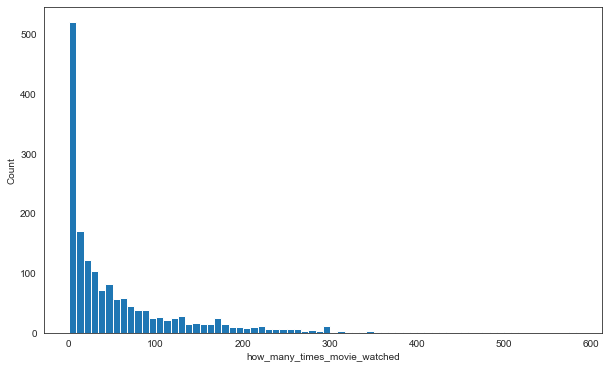

In [80]:
plt.figure(figsize = (10,6))
plt.hist(ratings['how_many_times_movie_watched'],bins = 70)
plt.xlabel("how_many_times_movie_watched")
plt.ylabel("Count")
plt.show()

#### Observation: So as we discused earlier that very few movies like Star wars , Liar Liar etc etc are movies which watched more than [400-500] times as we can see in histogram,and mostly movies which are flop/boaring watched very less time as we can see in graph range from (0-50)

## Distributions for Ratings

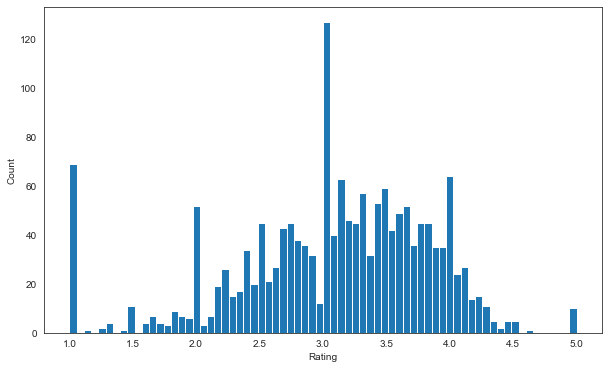

In [82]:
plt.figure(figsize = (10,6))
plt.hist(ratings['rating'],bins = 70)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#### Observation: So here we can see Symmetric Distribution with most of the people are likely to give movies 3 rating as can see in given hsitogram

### So lets combine both features and observe results

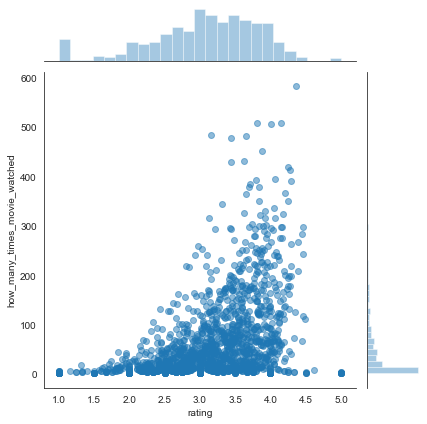

In [83]:
sns.jointplot(x = "rating", y = "how_many_times_movie_watched",data = ratings,alpha = 0.5)

### Conclusion:
    1] Here we can see some Monotonous relationship as views inc with rating inc.
    2] In given plot with rating 1.0 have [0-10] views and also rating of 5.0 with [0-10] views. these movies comes under the category of Flop films.
    3] In given Plot we can see that one point with 4.3 with around [550-600]. These follows monotonic relationship.eg:Highest grossing films like Aliens,Godfather,Star Wars etc etc....

# Create Movie Recommendation

In [84]:
df.head(3)

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)


### Our task to create a DataFrame in which we can see each movie as single feature with each user as datapoint

In [88]:
movie = df.pivot_table(index = "user_id",columns = "title",values = "rating")

In [89]:
movie

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### So here we have created DataFrame where we can see lots of NAN values bcoz every user_id cannot watch and rate all movies

### We can also look for seperate movie

In [97]:
a_space_odyssey_ratings = movie['2001: A Space Odyssey (1968)']

a_space_odyssey_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    NaN
5    4.0
Name: 2001: A Space Odyssey (1968), dtype: float64

### We can Co-relate this film and can see which movies are highly co-related with this film.

#### Lets Check Correlation for 1968 Sci-fi film 2001: A Space Odessey

In [99]:
similar_to_space_odyssey = movie.corrwith(a_space_odyssey_ratings)


similar_to_space_odyssey.head()

title
'Til There Was You (1997)   -0.426401
1-900 (1994)                -0.981981
101 Dalmatians (1996)       -0.043407
12 Angry Men (1957)          0.178848
187 (1997)                  -0.554700
dtype: float64

In [101]:
# Create DataFrame

corr_space_odessey = pd.DataFrame(similar_to_space_odyssey,columns = ['Correlation'])

In [103]:
corr_space_odessey.head()

,Correlation
title,
'Til There Was You (1997),-0.426401
1-900 (1994),-0.981981
101 Dalmatians (1996),-0.043407
12 Angry Men (1957),0.178848
187 (1997),-0.554700


In [104]:
corr_space_odessey.dropna(inplace = True)

In [111]:
corr_space_odessey.sort_values(by = "Correlation",ascending = False).head(10)

,Correlation
title,
Faithful (1996),1.0
"Good Man in Africa, A (1994)",1.0
Dream With the Fishes (1997),1.0
Switchback (1997),1.0
2001: A Space Odyssey (1968),1.0
Deep Rising (1998),1.0
Midnight Dancers (Sibak) (1994),1.0
Selena (1997),1.0
Safe Passage (1994),1.0


#### Conclusion: These are Top 10 Films which are highly Correlated to 2001: A Space Odyssey (1968)

## Filteration

#### As we discussed earlier there was some movies which rated by less people with higher rating so those movies does not make sense so we  should place threshold where user ratings more than 100 only those movies should be recommended

In [112]:
corr_space_odessey.head(3)

,Correlation
title,
'Til There Was You (1997),-0.426401
1-900 (1994),-0.981981
101 Dalmatians (1996),-0.043407


In [113]:
ratings.head(3)

,rating,how_many_times_movie_watched
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109


In [115]:
#Join

corr_space_odessey = corr_space_odessey.join(ratings['how_many_times_movie_watched'])

In [120]:
corr_space_odessey[corr_space_odessey['how_many_times_movie_watched']>100].sort_values(by = "Correlation",ascending = False).head()

,Correlation,how_many_times_movie_watched
title,,
2001: A Space Odyssey (1968),1.000000,259
True Romance (1993),0.459189,104
Natural Born Killers (1994),0.442248,128
Being There (1979),0.425009,116
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),0.392916,194


### Conclusion: So here we have first Filtered out all movies with less than 100 user rating,then sortvalues by correlation with Descending so that we will get highly correlation more towards 1

# Predict Function

In [121]:
def predict_movie(movie_name):
    # First step : Enter a movie name you want to find similar with
    movie_ratings = movie[movie_name]
    # Step 2 : Find Correlation of that movie
    similar_to_movie = movie.corrwith(movie_ratings)
    
    #Step 3 Create DataFrame
    corr_movie = pd.DataFrame(similar_to_movie,columns = ['Correlation'])
    #Step 4 Drop NA values
    corr_movie.dropna(inplace = True)
    
    #Step 5 Join
    corr_movie = corr_movie.join(ratings['how_many_times_movie_watched'])
    
    #Step 6: Prediction
    predictions = corr_movie[corr_movie['how_many_times_movie_watched']>100].sort_values(by = "Correlation",ascending = False)
    
    return predictions

In [127]:
predictions = predict_movie("Star Wars (1977)")

In [128]:
predictions.head()

,Correlation,how_many_times_movie_watched
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
